In [53]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [54]:
df = pd.read_csv('user_behavior_dataset.csv')

In [55]:
pd.set_option('display.max_columns',15)

In [56]:
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.40,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.70,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.00,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.80,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.30,1367,58,988,31,Female,3


In [57]:
df.tail(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.90,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.80,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.10,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.70,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.40,1306,49,828,23,Female,3


In [58]:
df.shape

(700, 11)

In [59]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [61]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [62]:
df.duplicated().sum()

0

# Checking Each column

In [63]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [64]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [65]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

In [66]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [67]:
pd.options.display.float_format = '{:.2f}'.format

In [68]:
df = df.drop(columns=['User ID'])

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
App Usage Time (min/day),700.00,271.13,177.20,30.00,113.25,227.50,434.25,598.00
Screen On Time (hours/day),700.00,5.27,3.07,1.00,2.50,4.90,7.40,12.00
Battery Drain (mAh/day),700.00,1525.16,819.14,302.00,722.25,1502.50,2229.50,2993.00
Number of Apps Installed,700.00,50.68,26.94,10.00,26.00,49.00,74.00,99.00
Data Usage (MB/day),700.00,929.74,640.45,102.00,373.00,823.50,1341.00,2497.00
Age,700.00,38.48,12.01,18.00,28.00,38.00,49.00,59.00
User Behavior Class,700.00,2.99,1.40,1.00,2.00,3.00,4.00,5.00


In [70]:
# Seprating numerical and categorical columns
numerical_columns= [col for col in df.select_dtypes(include=['number']).columns if col!='User Behavior Class']

categorical_columns= df.select_dtypes(include=['object','category'])

In [71]:
#printing the unique value in each column
for col in categorical_columns:
    print(f"{col} : {df[col].unique()}")

Device Model : ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
Operating System : ['Android' 'iOS']
Gender : ['Male' 'Female']


In [72]:
numerical_columns

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

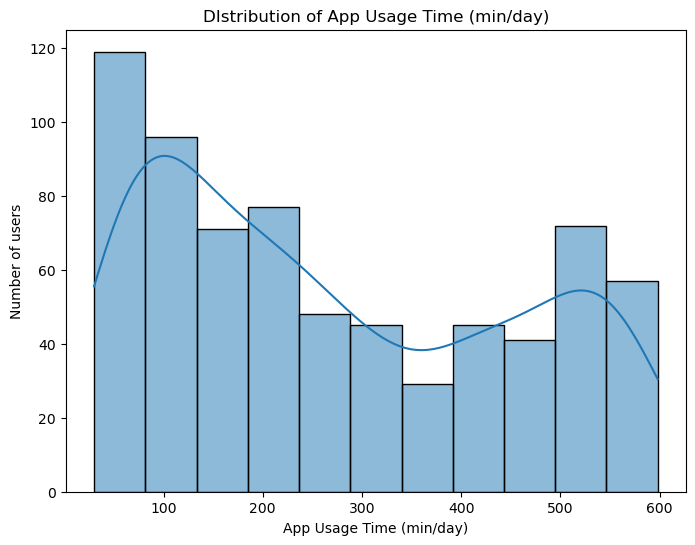

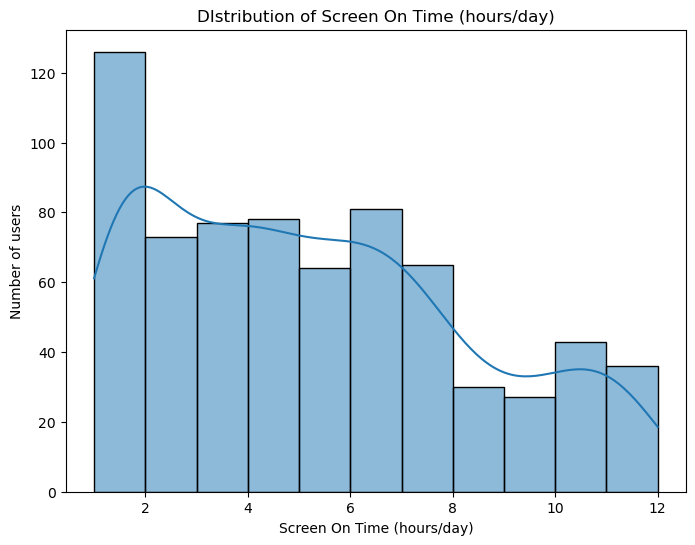

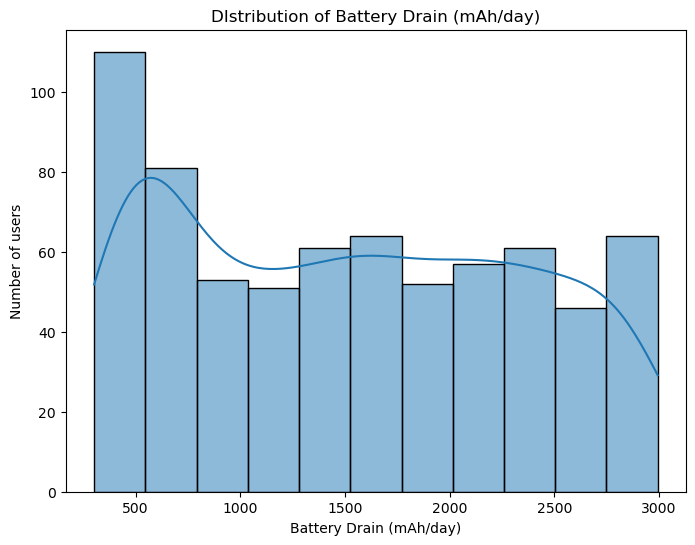

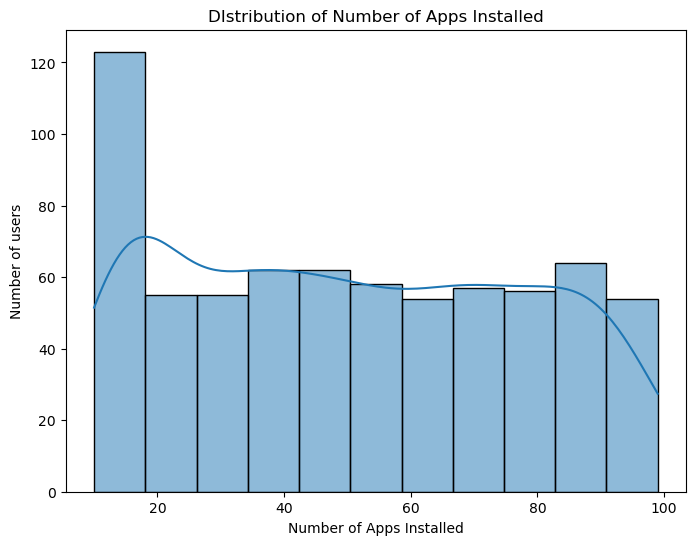

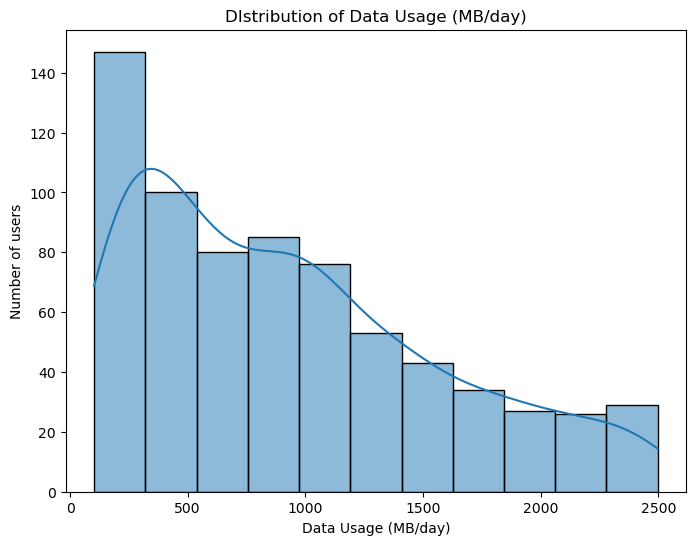

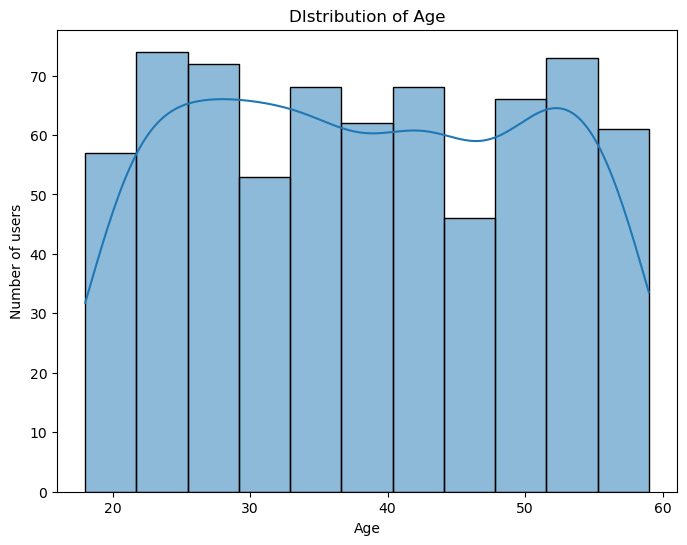

In [73]:
for col in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True)
    plt.title(f"DIstribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Number of users')
    plt.show
    

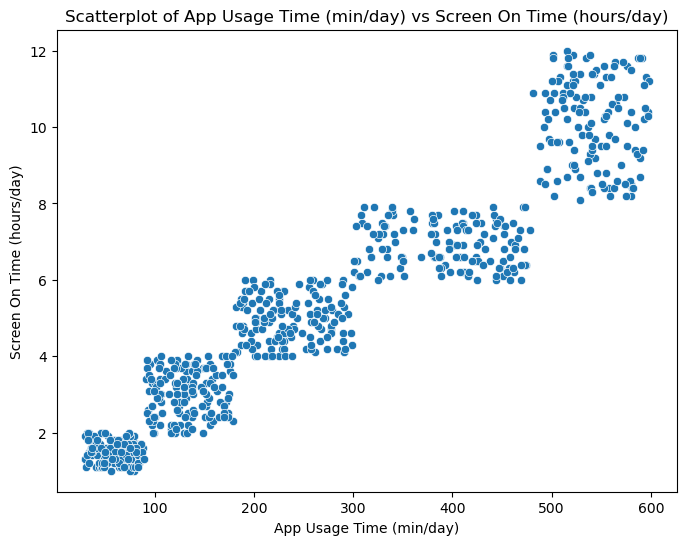

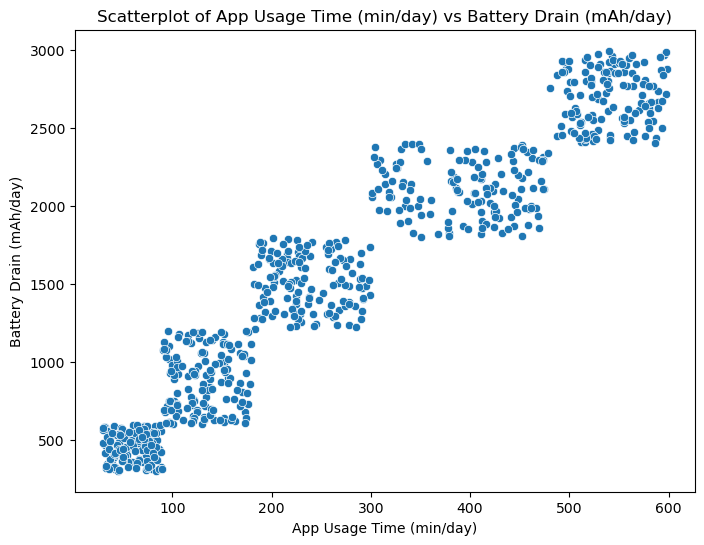

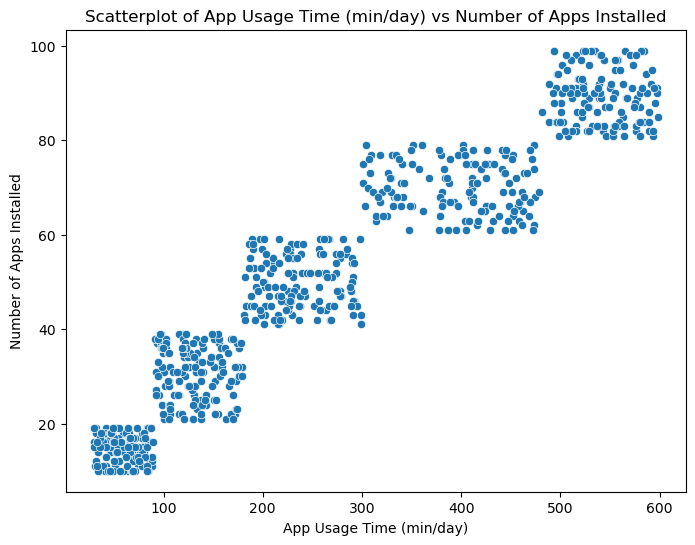

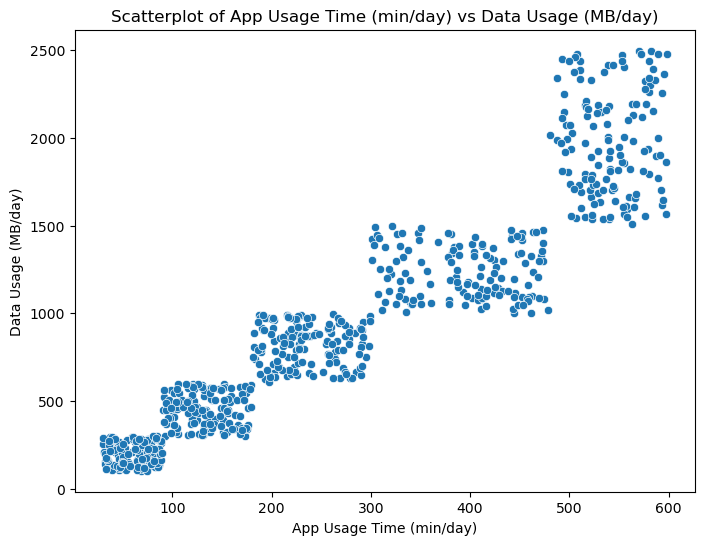

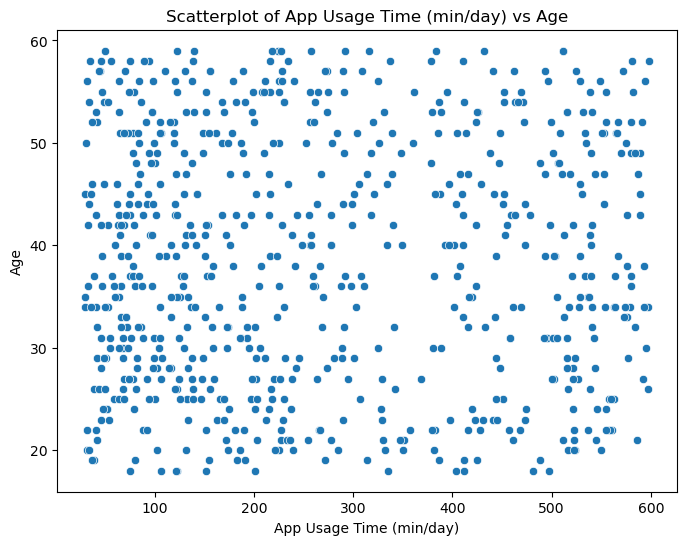

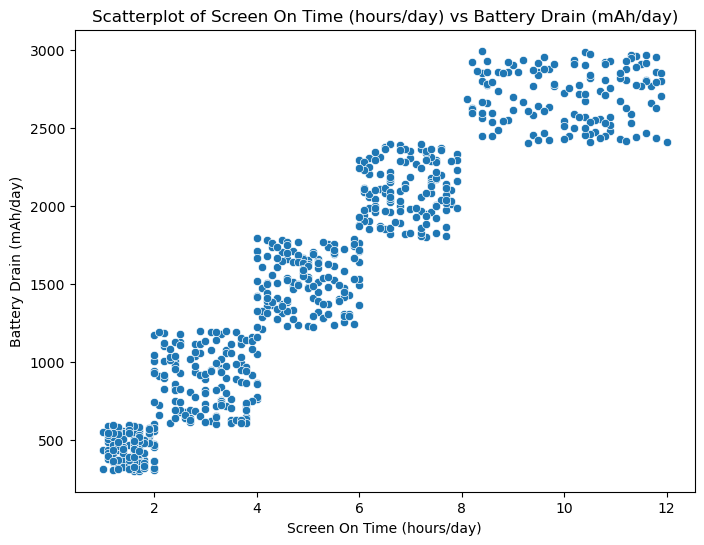

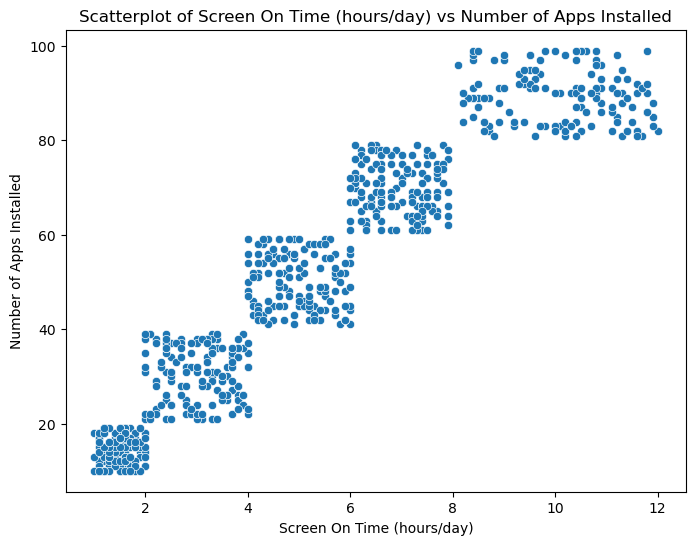

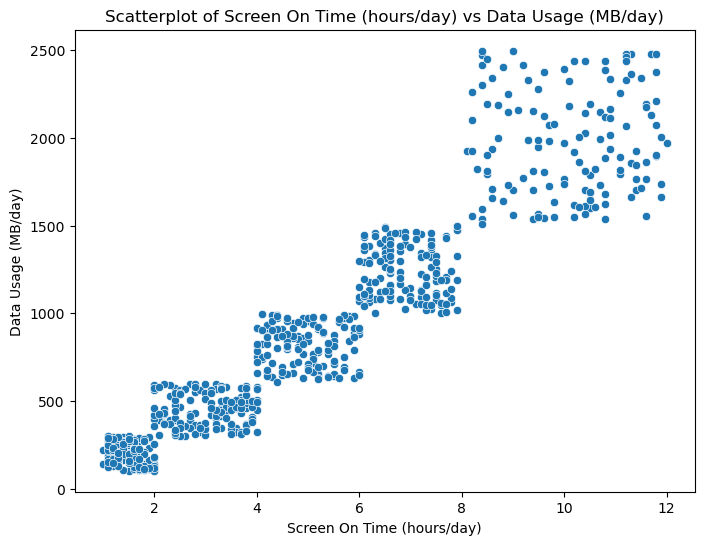

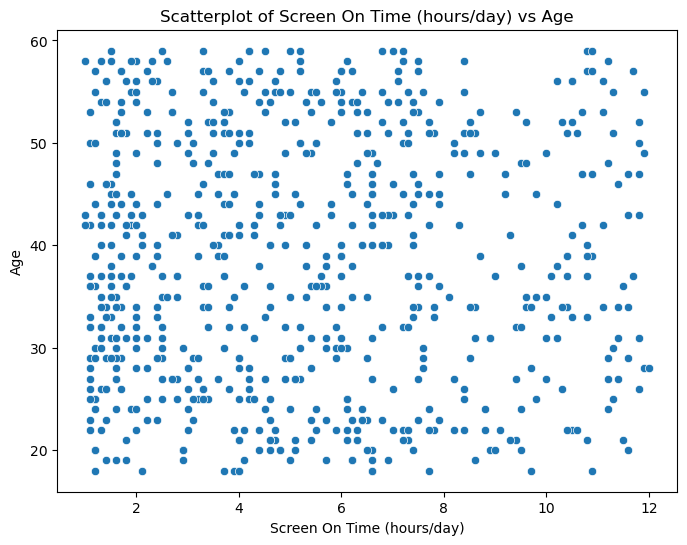

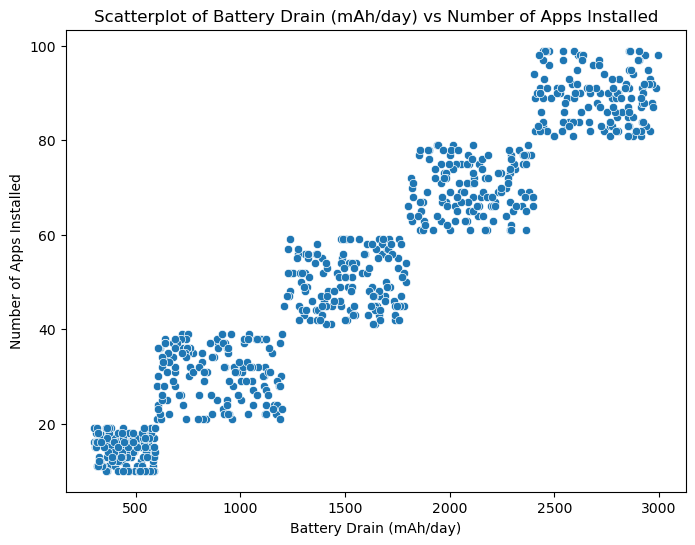

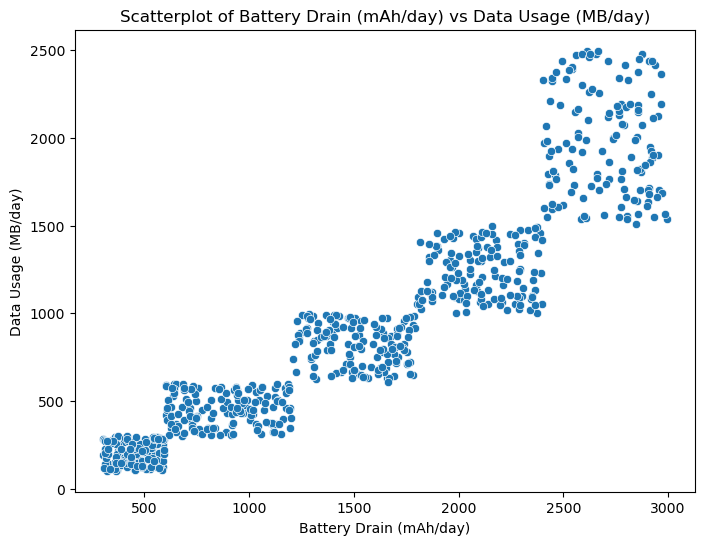

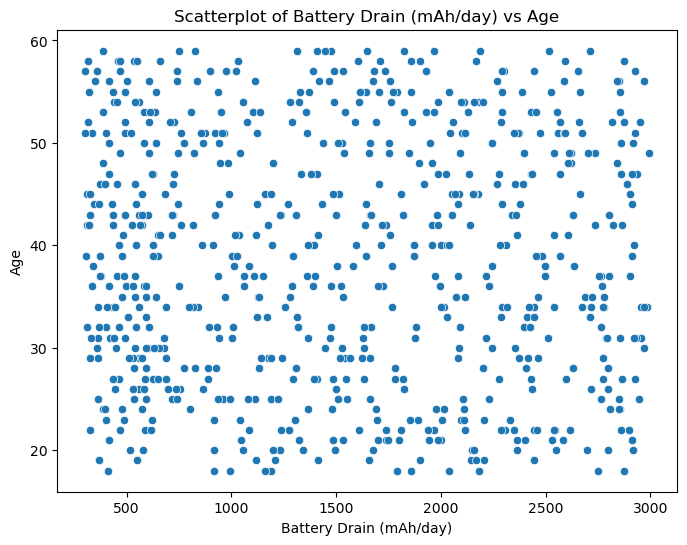

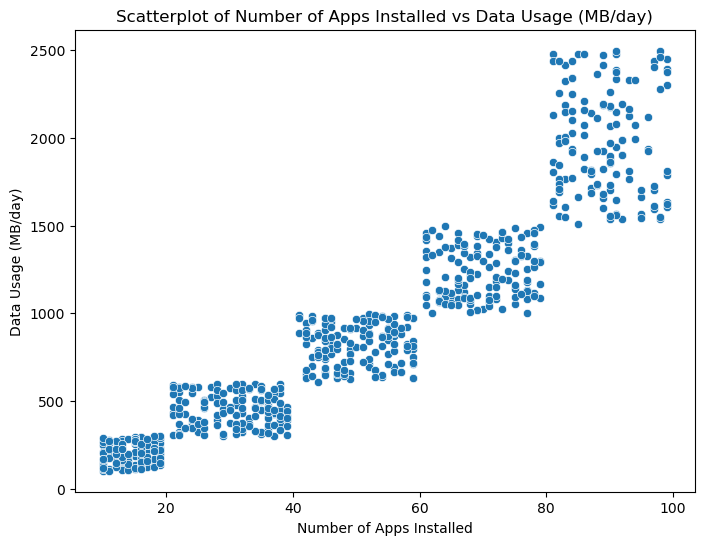

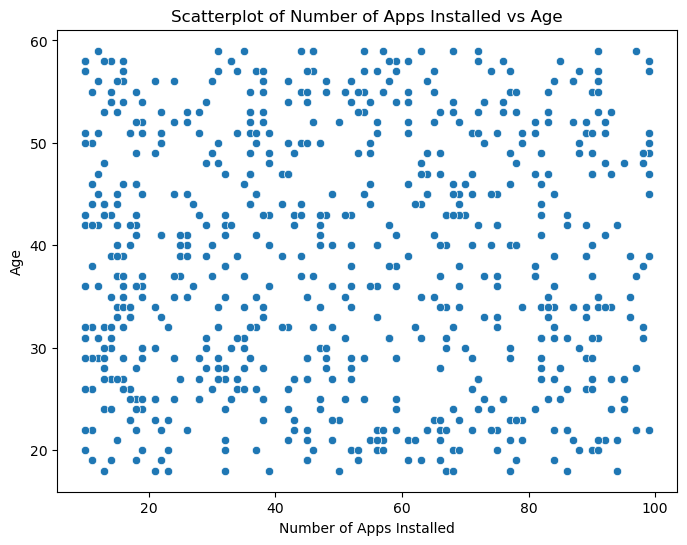

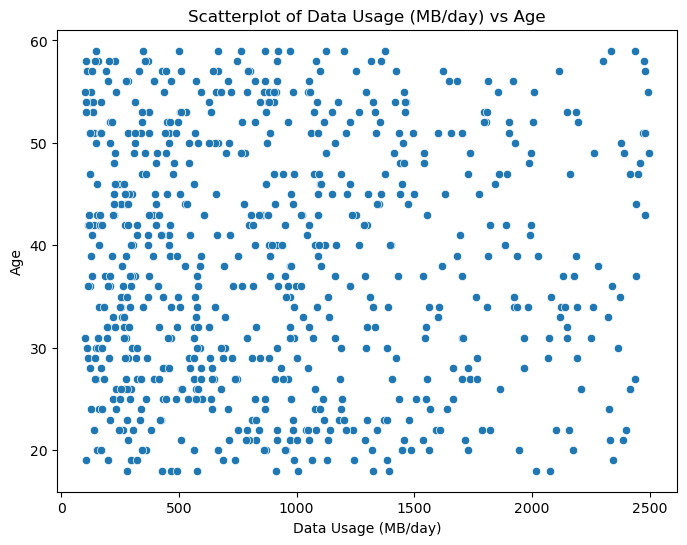

In [74]:
for i in range(len(numerical_columns)):
    for j in range(i+1,len(numerical_columns)):
        col1=numerical_columns[i]
        col2=numerical_columns[j]
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=df[col1],y=df[col2])
        plt.title(f'Scatterplot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
    

**It is evident that 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', and 'Data Usage (MB/day)' are closely related. Further analysis is needed to confirm these relationships.**

# Heat Map

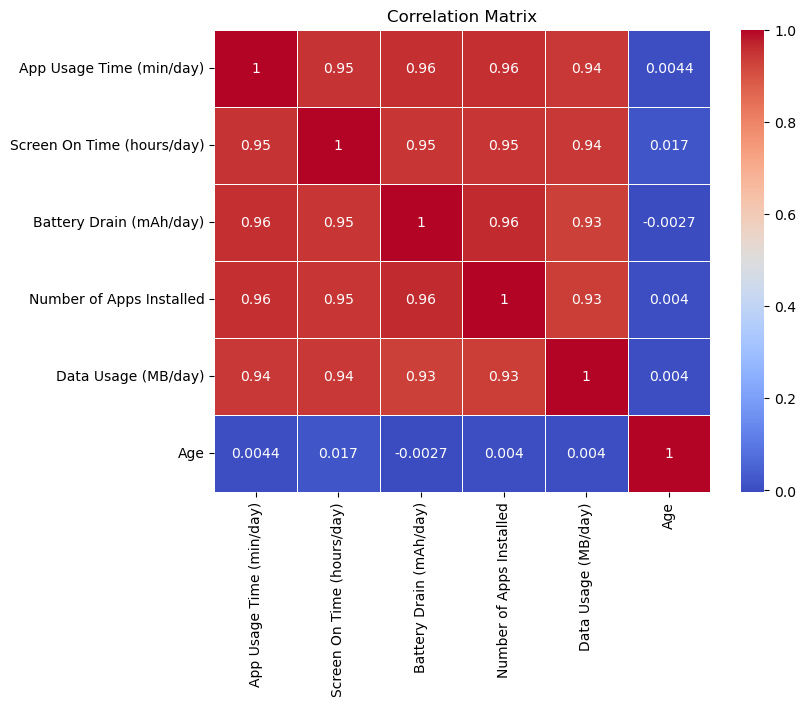

In [75]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8,6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix indicates strong positive relationships among **App Usage Time, Screen On Time, Battery Drain, Number of Apps Installed, and Data Usage**. This suggests that users who spend more time using apps tend to have higher screen time and battery usage, as well as a larger number of installed apps and data consumption.

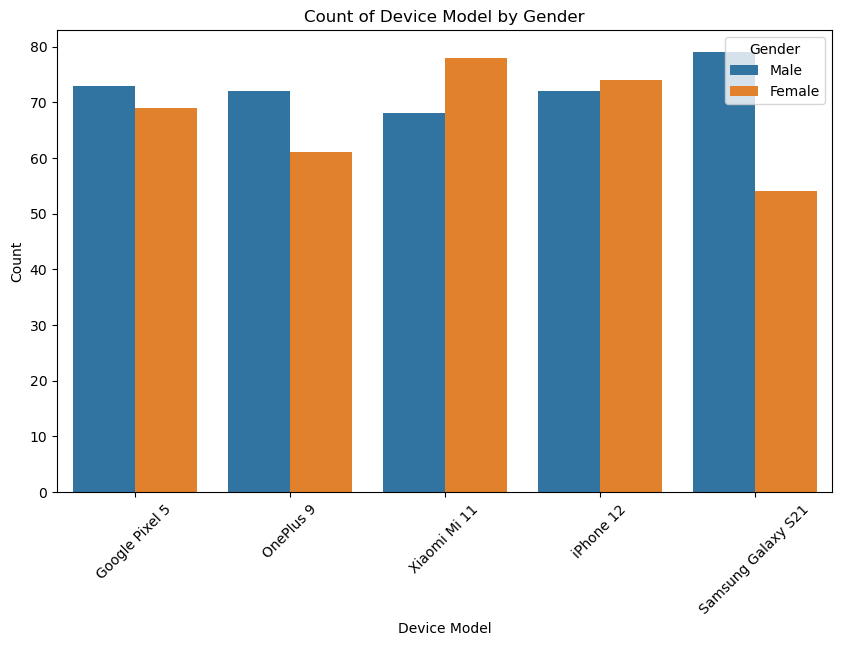

In [76]:
df1=pd.DataFrame(categorical_columns)
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Device Model', hue='Gender')
plt.title('Count of Device Model by Gender')
plt.xticks(rotation=45)
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

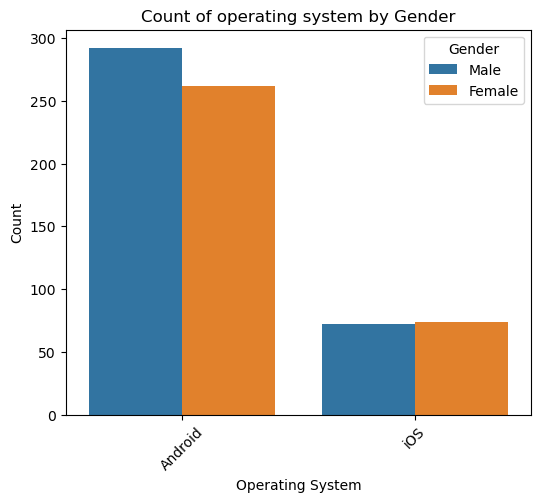

In [77]:
plt.figure(figsize=(6,5))
sns.countplot(data=df1,x='Operating System',hue='Gender')
plt.title('Count of operating system by Gender')
plt.xticks(rotation=45)
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


**We found that both gender prefer Android os over IOS os**

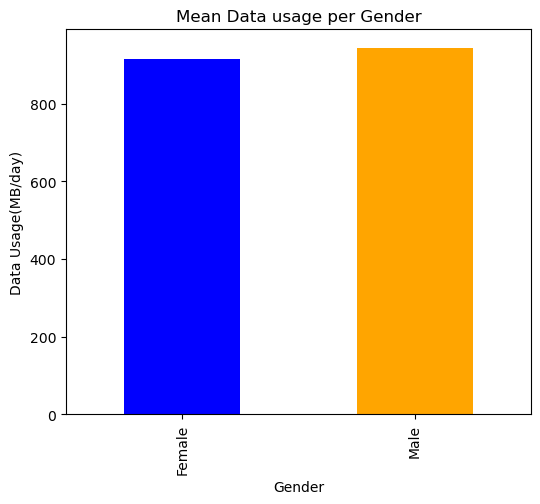

In [78]:
mean_data_usage = df.groupby('Gender')['Data Usage (MB/day)'].mean()
plt.figure(figsize=(6,5))
mean_data_usage.plot(kind='bar',color=['blue','orange'])
plt.title("Mean Data usage per Gender")
plt.xlabel('Gender')
plt.ylabel('Data Usage(MB/day)')
plt.show()


**From the above results, we found that both Gender eqaully active on internet**

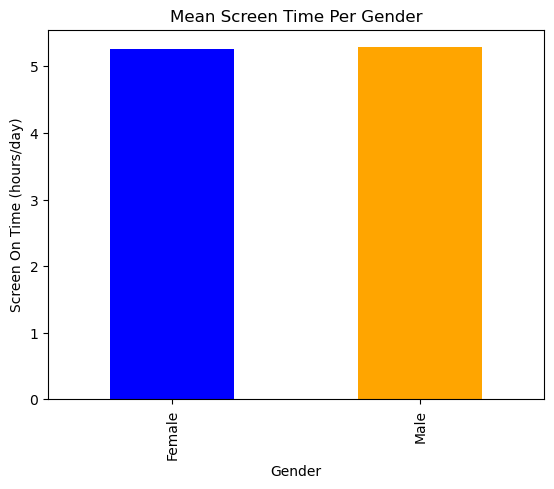

In [79]:
mean_usage = df.groupby('Gender')['Screen On Time (hours/day)'].mean()


mean_usage.plot(kind='bar', color=['blue','orange'])
plt.title("Mean Screen Time Per Gender")
plt.xlabel('Gender')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

**Therefore, we can conclude from the mean that, on average, both genders use the phone equally.**

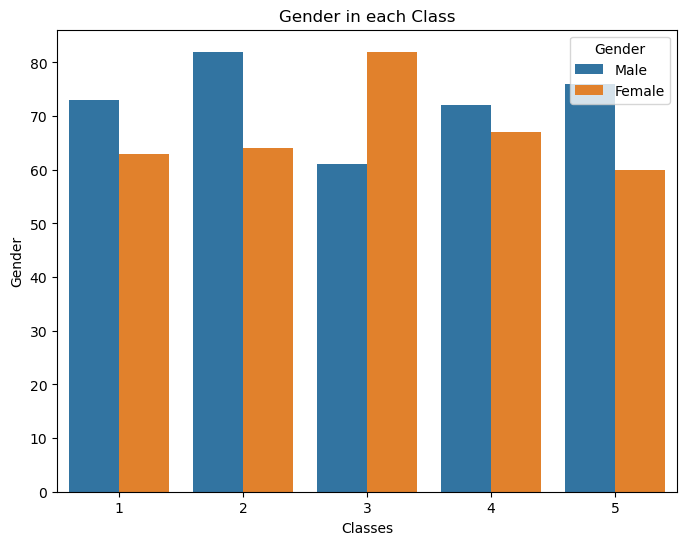

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='User Behavior Class',hue='Gender')
plt.title('Gender in each Class')
plt.xlabel("Classes")
plt.ylabel("Gender")
plt.show()


**As we found that both gender uses the internet equally, so we tries to draw a relation between the Gender and the user behavior class, and we found, Mostly males numbers are higher in each class except for class 3.**